# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds
#ds.head()
#columnas=ds.columns.values
#print(columnas)


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
# Se halla indice de la casa mas cara del data set
ind_cara=ds['price'].idxmax()
#Se imprime el dato solicitado junto a otros de la misma fila
print('La casa ubicada en', ds.loc[ind_cara, 'address'], 'con No.', ind_cara,' es la más cara y su precio es de: $', ds.loc[ind_cara, 'price'] ,'USD')


La casa ubicada en El Escorial con No. 13110  es la más cara y su precio es de: $ 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [3]:
#Se crea un nuevo dataframe excluyendo las filas con valores nulos y con precio en 0
ds_precio=ds[ds['price'].notnull() & (ds['price'] > 0)]

#Se halla indice de la casa mas barata del dataset
ind_barata=ds_precio['price'].idxmin()

#Se imprime el dato solicitado junto a otros de la misma fila
print('La casa casa ubicada en', ds.loc[ind_barata, 'address'], 'con No.', ind_barata,'es la más barata y su precio es de: $', ds.loc[ind_barata, 'price'] ,'USD')

La casa casa ubicada en Berlin, Coslada con No. 7491 es la más barata y su precio es de: $ 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [4]:
#Se hallan los indices de la casa mas grande y pequeña del data set
mas_grande=ds['surface'].idxmax()
mas_peque=ds['surface'].idxmin()
#Se imprimen los datos solicitados junto a otros de la misma fila
print('La casa ubicada en', ds.loc[mas_grande, 'address'], 'con No.', mas_grande,'es las grande de la lista y su tamaño es de', ds.loc[mas_grande, 'surface'] ,'m2')
print('La casa ubicada en', ds.loc[mas_peque, 'address'], 'con No.', mas_peque,'es la mas pequeña de la lista y su tamaño es de', ds.loc[mas_peque, 'surface'] ,'m2')

La casa ubicada en Sevilla la Nueva con No. 6794 es las grande de la lista y su tamaño es de 249000.0 m2
La casa ubicada en Calle Amparo,  Madrid Capital con No. 498 es la mas pequeña de la lista y su tamaño es de 15.0 m2


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
#Obtener las poblaciones sin duplicados desde la columna Level5id
poblaciones_u = ds['level5'].unique()

#Imprimir la cantidad de poblaciones 
print('La cantidad de poblaciones de nivel 5 son:', len(poblaciones_u))

#Imprimir las poblaciones uniendo cada dato separado por coma
print('Se listan a continuación: ' + ', '.join(poblaciones_u))

La cantidad de poblaciones de nivel 5 son: 168
Se listan a continuación: Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo d

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [6]:
# Obtener true o flase si cada columna tiene NAs
tiene_na = ds.isnull().any()


#impimirlo
print(tiene_na)

Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
dtype: bool


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [7]:
# Eliminar todas las filas con al menos un NaN
ds_limpio = ds.dropna(axis=0)

# Mostrar las nuevas dimensiones
print('El tamaño original es de :', ds.shape, 'filas, columnas')
print('Después de eliminar las filas que contienen NAs el tamaño resultante es:', ds_limpio.shape)

El tamaño original es de : (15335, 37) filas, columnas
Después de eliminar las filas que contienen NAs el tamaño resultante es: (0, 37)


#### Ejercicio 07. ¿Cuál es la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [8]:
# Crea un data frame con solo las filas donde level5 es "Arroyomolinos (Madrid)"
filtro_ar = ds[ds['level5'] == 'Arroyomolinos (Madrid)']

# Calcula la media de la columna de precios del data frame nuevo
media_ar = filtro_ar['price'].mean()

# Imprimir el resultado
print('la media de precios en la poblacion Arroyomolinos (Madrid) es $', round(media_ar, 2), 'USD')

la media de precios en la poblacion Arroyomolinos (Madrid) es $ 294541.6 USD


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


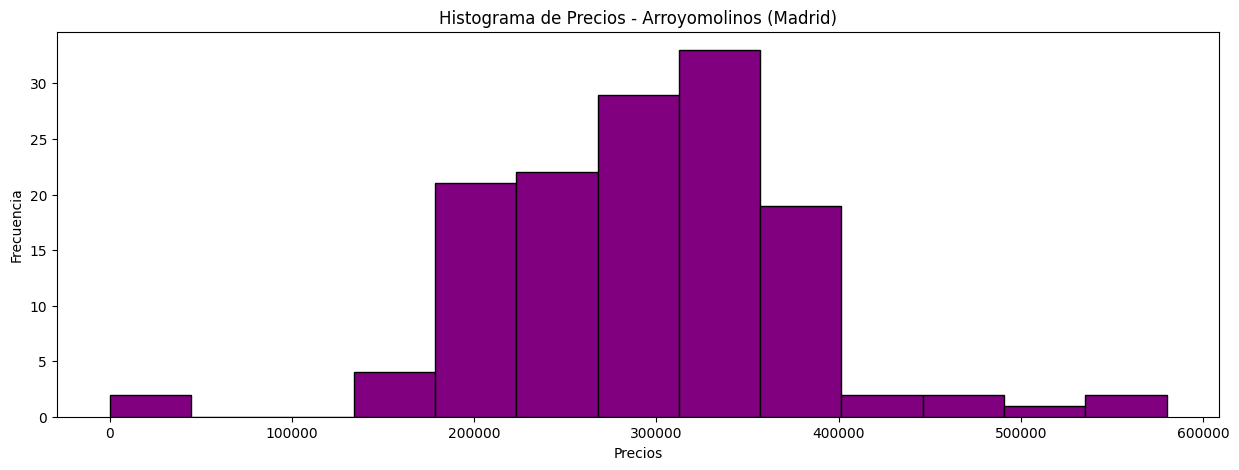

In [9]:
import matplotlib.pyplot as plt

precios = filtro_ar['price'].dropna()

plt.figure(figsize=(15, 5))
plt.hist(precios, bins='auto', color='purple', edgecolor='black')

plt.title('Histograma de Precios - Arroyomolinos (Madrid)')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.show()


En el histograma de precios contra frecuencia se puede apreciar que existen valores atipicios tanto muy bajos como muy altos, sin embargo la frecuencia es mayor en los altos. Tambien se nota que no es simetrica y que hay mayor frecuencia en los valores cercanos a los 350000, el cual no es el valor central, por lo que se puede concluir que es una población con una buena valorización con tendencia a valores altos.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [10]:
# Obtener los promedios de las localidades de Valdemorrillo y Galapagar
filtro_valde = ds[ds['level5'] == 'Valdemorillo']['price'].dropna().mean()
filtro_galapagar = ds[ds['level5'] == 'Galapagar']['price'].dropna().mean()

#Imprimir los resultados de estos valores promedio y conclusion
print("El precio promedio de Valdemorrillo es: $", round(filtro_valde, 2), "USD, mientras que el precio promedio de Galapagar es: $", round(filtro_galapagar, 2), "USD, lo cual es bastante similar pero no es igual, si se busca un precio mas competitivo la opcion a elegir es alquilar en Galapagar")



El precio promedio de Valdemorrillo es: $ 363860.29 USD, mientras que el precio promedio de Galapagar es: $ 360063.2 USD, lo cual es bastante similar pero no es igual, si se busca un precio mas competitivo la opcion a elegir es alquilar en Galapagar


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [11]:
#crear la nueva fila dividiendo ambos valores para obtener la relacion 
ds['pps']=ds['price']/ds['surface']

#Filtrar y obtener los promedios de las localidades de Valdemorrillo y Galapagar
filtro_Valde2 = ds[ds['level5'] == 'Valdemorillo']['pps'].dropna().mean()
filtro_Galapagar2 = ds[ds['level5'] == 'Galapagar']['pps'].dropna().mean()

#Imprimir los resultados de estos valores promedio y conclusion
print("El precio por m2 promedio de Valdemorrillo es: $", round(filtro_Valde2, 2), "USD, mientras que el de Galapagar es: $", round(filtro_Galapagar2, 2), "USD, \n lo cual indica que a pesar de que el precio promedio de valdemorrillo es mas alto en el ejercicio anterior, \n con el dato actual se concluye que se estan ofreciendo apartamentos con mayores dimensiones por un precio mas bajo frente \n a Galapagar, siendo esto un factor importante al tomar decisiones")


El precio por m2 promedio de Valdemorrillo es: $ 1317.95 USD, mientras que el de Galapagar es: $ 1606.32 USD, 
 lo cual indica que a pesar de que el precio promedio de valdemorrillo es mas alto en el ejercicio anterior, 
 con el dato actual se concluye que se estan ofreciendo apartamentos con mayores dimensiones por un precio mas bajo frente 
 a Galapagar, siendo esto un factor importante al tomar decisiones


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

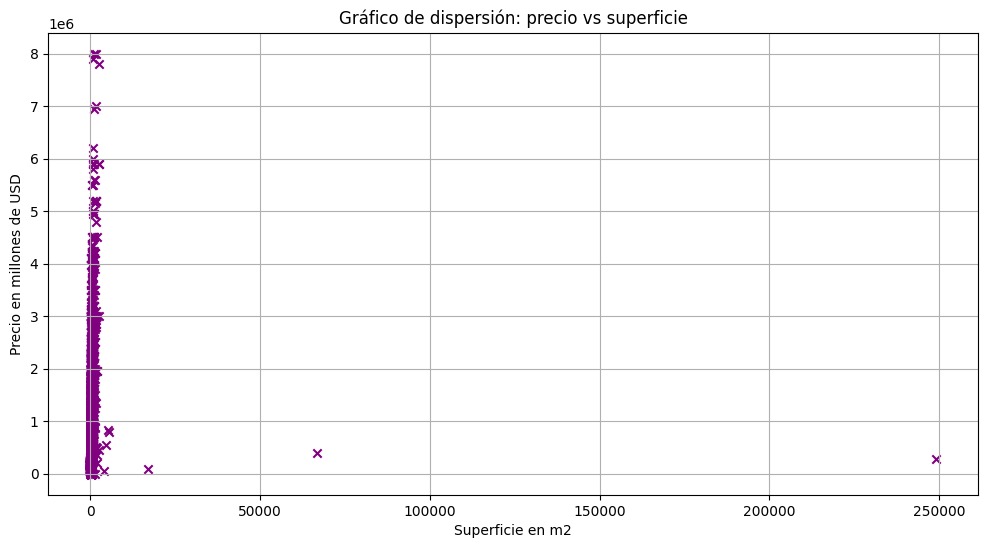

In [12]:
# Obtenemos los precios y superficies para luego usarlos en la grafica
y_precio = ds['price']
x_superficie= ds['surface']

#x_superficie.describe()
#y_precio.describe()

# Generamos la grafica de precios vs superficies
plt.figure(figsize=(12,6))
plt.scatter(x_superficie, y_precio, marker='x', color='purple')
plt.title('Gráfico de dispersión: precio vs superficie')
plt.xlabel('Superficie en m2')
plt.ylabel('Precio en millones de USD')

#plt.xscale('log')
plt.grid(True)
plt.show()

Valores que toman ambas columnas:

los precios= min: 0; max: 8.5M; media: 477k; cantidad de valores validos: 15335

Las superficies= min: 15m2; max: 249k; media: 196; cantidad de valores validos: 14085

Teniendo en cuenta el comportamiento de ambos datos, la estala que propone python en el eje 'Y' de 1e06 me parece correcta, ya que la media esta por un orden similar, sin embargo en el eje x se obtienen unos pocos valores atipicos que estan muy por encima de la media y que estan bastante dispersos, por lo que para alcanzar a graficarlos todos en el eje, la grafica se torna un poco incomprensible ya que los valores mas frecuentes se encuentran en un rango mas cercano, una opción a proponer seria no graficar estos valores por encima de 10000 por ejemplo, ya que los valores por encima de ese rango son poco frecuentes.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [13]:
# Obtenemos las agencias sin duplicados desde la columna realEsatate_name
agencias_u = ds['realEstate_name'].unique()

# Imprimimos el dato
print("La cantidad de agencias en el dataset son: ", len(agencias_u))

La cantidad de agencias en el dataset son:  1822


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [14]:
# Importamos Counter desde collections
from collections import Counter

# Usamos counter que nos crea un diccionario ordenado de mayor a menor con el dato mas frecuente en la columna level5
frecuencia_poblaciones=Counter(ds['level5'])

#imprimimos la llave de el valor mas comun que es la primera posicion en la tupla obtenida
print("La población con la mayor cantidad de casas es",frecuencia_poblaciones.most_common(1)[0][0])

La población con la mayor cantidad de casas es  Madrid Capital


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [15]:
# Generamos un lista de poblaciones a filtrar en el dataframe ds
poblaciones= ["Fuenlabrada","Leganés","Getafe","Alcorcón"]

# Generamos un nuevo dataframe que contiene solo las filas que coinciden con esas poblaciones
nueva_data=ds[ds['level5'].isin(poblaciones)]

# Imprimimos el nuevo dataframe
print(nueva_data)


       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

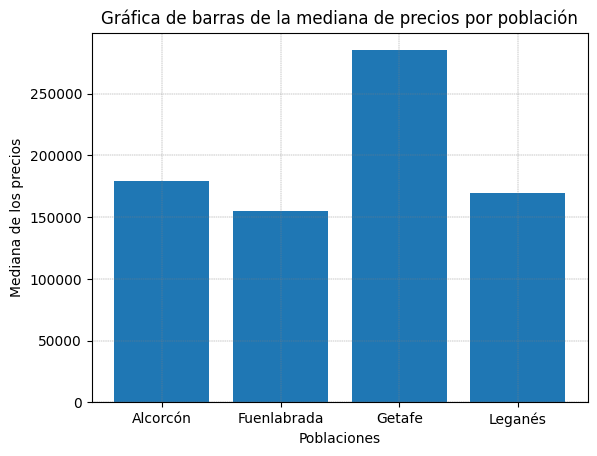

In [16]:
# Generamos una serie con las medianas de los precios de las 4 poblaciones solicitadas
nuevo_mediana = nueva_data.groupby('level5')['price'].median()

# Generamos una grafica con los valores de la serie, el eje x son los index y la y los valores de las medias es decir los values
plt.bar(nuevo_mediana.index, nuevo_mediana.values)
plt.xlabel('Poblaciones')
plt.ylabel('Mediana de los precios')
plt.title('Gráfica de barras de la mediana de precios por población')
plt.grid(True, color='gray', linestyle='--', linewidth=0.3)
plt.show()


De la anterior grafica se puede concluir que el valor central de precios de Getafe es el mayor, el de Fuenlabrada el menor y las poblaciones Alcorcón y Leganés poseen valores similares estando intermedios.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [17]:
# Obtenemos los valores promedio de cada columna
nuevo_media = nueva_data[['price','rooms','surface','bathrooms']].mean()

# Imprimimos esos datos promedio
print("los valores promedio por cada columna son los siguientes:\n",round(nuevo_media, 2))

# Obtenemos los valores de varianza de cada columna
nuevo_varianza = nueva_data[['price','rooms','surface','bathrooms']].var()

# Imprimimos esos datos de varianza
print("los valores de varianza por cada columna son los siguientes:\n", nuevo_varianza)



los valores promedio por cada columna son los siguientes:
 price        223094.48
rooms             3.02
surface         111.75
bathrooms         1.63
dtype: float64
los valores de varianza por cada columna son los siguientes:
 price        1.492137e+10
rooms        7.188859e-01
surface      4.263052e+03
bathrooms    5.717969e-01
dtype: float64


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [18]:
# Agrupamos basado en los valores que toma la columna Level5 y obtenenos el indice de mayor valor por cada población
mas_cara_nuevo = nueva_data.loc[nueva_data.groupby('level5')['price'].idxmax()]

# Hacemos un ciclo para que imprima por cada poblacion el valor de la casa mas cara e informacion a su vez de precio y dirección
for index, row in mas_cara_nuevo.iterrows():
    poblacion = row['level5']  
    precio = row['price']      
    direccion = row['address']  
    print(f"La casa más cara en {poblacion} tiene un precio de {precio}USD y se encuentra en {direccion}")

La casa más cara en Alcorcón tiene un precio de 950000USD y se encuentra en Alcorcón
La casa más cara en Fuenlabrada tiene un precio de 490000USD y se encuentra en Calle de Paulo Freire, 5, Fuenlabrada
La casa más cara en Getafe tiene un precio de 1050000USD y se encuentra en Getafe
La casa más cara en Leganés tiene un precio de 650000USD y se encuentra en Avenida Reina Sofía, Leganés


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_804/2701434657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nueva_data['precio_normalizado'] = nueva_data.groupby('level5')['price'].transform(


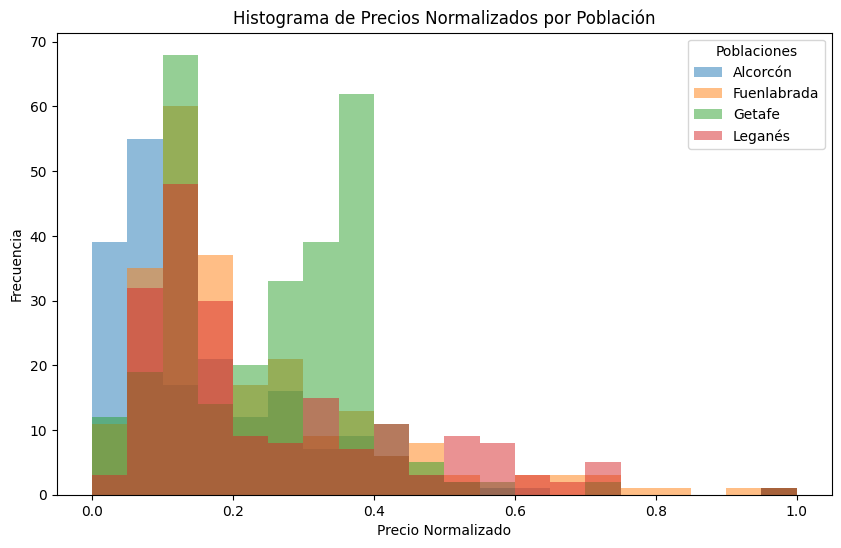

In [19]:
# Normalizamos los precios en una nueva columna para cada población usando la formula Min-Max con la funcion lambda
nueva_data['precio_normalizado'] = nueva_data.groupby('level5')['price'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Crear una figura para los gráficos
plt.figure(figsize=(10, 6))

# Agrupamos los datos por población y trazamos los histogramas
for poblacion, datos_poblacion in nueva_data.groupby('level5'):
 
    # Filtrar los precios normalizados de la población actual
    precios_poblacion = datos_poblacion['precio_normalizado']
    
    # graficar el histograma para cada población
    plt.hist(precios_poblacion, bins=20, alpha=0.5, label=poblacion)

# Añadimos título, ejes, leyenda a las graficas
plt.title('Histograma de Precios Normalizados por Población')
plt.xlabel('Precio Normalizado')
plt.ylabel('Frecuencia')
plt.legend(title='Poblaciones')
plt.show()

En la anterior gráfica de precios normalizados por frecuencia se nota que en general las 4 poblaciones tienen mayor frecuencia en valores de precio normalizados entre 0 y 0.2, es decir en los menores, haciéndose menos frecuente con el aumento del precio, lo anterior describe perfectamente el comportamiento sobre todo de las poblaciones Fuenlabrada y Alcorcón, sin embargo como diferencia se puede apreciar que Getafe presenta un segundo pico cerca de 0.4 lo cual sigue siendo un valor de precio menor a 0.5. También, es de notar que la población Leganés continúa teniendo algunas frecuencias en valores de precio más altos.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [20]:
pps_getafe = nueva_data[nueva_data['level5'] == 'Getafe']['pps'].mean()
pps_alcorcón = nueva_data[nueva_data['level5'] == 'Alcorcón']['pps'].mean()
print("El precio de pps de Getafe es", round(pps_getafe, 2), "USD vs el precio de Alcorcón es", round(pps_alcorcón, 2), "USD por lo que basado en este dato se puede observar que Alcorcón es un poblacion mas valorizada")

El precio de pps de Getafe es 2066.31 USD vs el precio de Alcorcón es 2239.3 USD por lo que basado en este dato se puede observar que Alcorcón es un poblacion mas valorizada


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

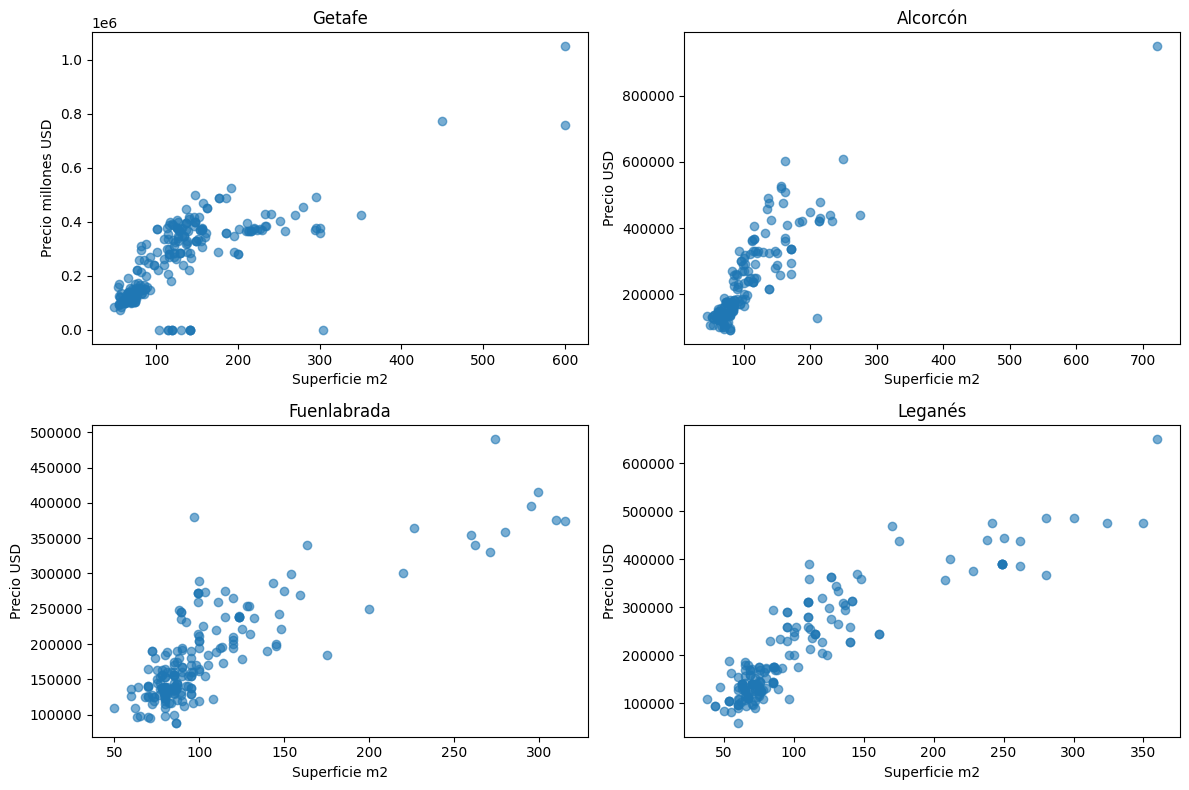

In [21]:
# Filtramos la data de cada poblacion
data_getafe = nueva_data[nueva_data['level5'] == 'Getafe']
data_alcorcón = nueva_data[nueva_data['level5'] == 'Alcorcón']
data_fuenlabrada = nueva_data[nueva_data['level5'] == 'Fuenlabrada']
data_leganés = nueva_data[nueva_data['level5'] == 'Leganés']

# Creamos la grafica general de 2 filas por 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Creamos la grafica de dispercion de precios de la poblacion Getafe
axs[0, 0].scatter(data_getafe['surface'], data_getafe['price'], alpha=0.6)
axs[0, 0].set_title('Getafe')
axs[0, 0].set_xlabel('Superficie m2')
axs[0, 0].set_ylabel('Precio millones USD')

# Creamos la grafica de dispercion de precios de la poblacion Alcorcón
axs[0, 1].scatter(data_alcorcón['surface'], data_alcorcón['price'], alpha=0.6)
axs[0, 1].set_title('Alcorcón')
axs[0, 1].set_xlabel('Superficie m2')
axs[0, 1].set_ylabel('Precio USD')

# Creamos la grafica de dispercion de precios de la poblacion Fuenlabrada
axs[1, 0].scatter(data_fuenlabrada['surface'], data_fuenlabrada['price'], alpha=0.6)
axs[1, 0].set_title('Fuenlabrada')
axs[1, 0].set_xlabel('Superficie m2')
axs[1, 0].set_ylabel('Precio USD')

# Creamos la grafica de dispercion de precios de la poblacion Leganés
axs[1, 1].scatter(data_leganés['surface'], data_leganés['price'], alpha=0.6)
axs[1, 1].set_title('Leganés')
axs[1, 1].set_xlabel('Superficie m2')
axs[1, 1].set_ylabel('Precio USD')

# Ajustamos el diseño del grafico para que no se sobreescriban los titulos en los ejes
plt.tight_layout()

# Mostramos la grafica
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [22]:
from ipyleaflet import Map, basemaps, CircleMarker, LayerGroup

# Mapa centrado en Madrid
map = Map(center = (40.35, -3.6), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.6], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [23]:
# Reemplazamos las comas por puntos y luego convertimos a tipo float 
# ya que algunos valores no eran validos por tener comas y no punto como separador decimal
nueva_data['latitude'] = nueva_data['latitude'].astype(str).str.replace(',', '.').astype(float)
nueva_data['longitude'] = nueva_data['longitude'].astype(str).str.replace(',', '.').astype(float)

# Creamos un diccionario para asignar un color a cada población
colores = {
    'Getafe': 'red',
    'Leganés': 'blue',
    'Fuenlabrada': 'green',
    'Alcorcón': 'orange'
}

# Creamos una lista para guardar los marcadores
marcadores = []

# Creamos un ciclo para recorrer cada fila del dataframe nueva_data
for i, fila in nueva_data.iterrows():
    lat = fila['latitude']
    lon = fila['longitude']
    poblacion = fila['level5']
    
    # Creamos un marcador tipo círculo 
    marcador = CircleMarker(
        location=(lat, lon),
        radius=5,
        color=colores.get(poblacion, 'black'),  # Color según la población
        fill=True,
        fill_opacity=0.6
    )
    
    # Agregamos el marcador a la lista
    marcadores.append(marcador)

# Agrupamos todos los marcadores en una sola capa
capa_marcadores = LayerGroup(layers=marcadores)

# Agregamos la capa al mapa
map.add_layer(capa_marcadores)

# Mostramos el mapa
map

#print(nueva_data[['level5', 'latitude', 'longitude']].head(10))


/tmp/ipykernel_804/694960126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nueva_data['latitude'] = nueva_data['latitude'].astype(str).str.replace(',', '.').astype(float)
/tmp/ipykernel_804/694960126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nueva_data['longitude'] = nueva_data['longitude'].astype(str).str.replace(',', '.').astype(float)


Map(center=[40.35, -3.6], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…